# Code for Section 2.1 Risk and return trade-off

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import fortitudo.tech as ft
import matplotlib.pyplot as plt

# Download and preprocess data

In [2]:
tickers = [
    'XLB', 'XLE', 'XLF', 'XLI', 'XLK',
    'XLP', 'XLU', 'XLV', 'XLY', '^GSPC',
    '^IRX', '^TNX', '^TYX', '^VIX']
data = yf.download(tickers, start='1998-12-22', end='2024-10-12')['Adj Close']

names_dict = {
    'XLB': 'Materials', 'XLE': 'Energy', 'XLF': 'Financial', 'XLI': 'Industrial',
    'XLK': 'Technology', 'XLP': 'Consumer Staples', 'XLU': 'Utilities',
    'XLV': 'Health Care', 'XLY': 'Consumer Discretionary',
    '^GSPC': 'S&P 500', '^IRX': '13w yield', '^TNX': '2y yield',
    '^TYX': '30y yield', '^VIX': 'VIX'}
data = data.rename(columns=names_dict)

print(f'The number of daily observations is {len(data)}.')

[*********************100%%**********************]  14 of 14 completed


The number of daily observations is 6493.


# Compute historical statistics

In [3]:
H = 1
equity_returns = (data.values[H:, 0:10] - data.values[0:-H, 0:10]) / data.iloc[0:-H, 0:10]
equity_returns_df = pd.DataFrame(100 * equity_returns, columns=data.columns[0:10])
equity_stats = ft.simulation_moments(equity_returns_df)

# Add 90%-CVaR
cvars = ft.portfolio_cvar(
    np.eye(len(equity_returns_df.columns)), equity_returns_df, alpha=0.9)
equity_stats['90%-CVaR'] = cvars[0, :]

# Print (Table 2.1 - 2.3)
display(equity_stats)

,Mean,Volatility,Skewness,Kurtosis,90%-CVaR
Ticker,,,,,
Materials,0.043597,1.502043,-0.019692,9.469311,2.734815
Energy,0.048124,1.820569,-0.247116,13.884919,3.264695
Financial,0.038107,1.816821,0.313334,17.525595,3.162831
Industrial,0.043473,1.338344,-0.163457,10.649345,2.477230
Technology,0.048140,1.633291,0.272815,10.138515,3.036455
Consumer Staples,0.031213,0.964162,-0.096686,10.945229,1.756345
Utilities,0.036334,1.224069,0.207070,14.820876,2.225238
Health Care,0.040118,1.130015,-0.021391,12.033235,2.061890
Consumer Discretionary,0.046224,1.427962,-0.226209,8.958203,2.643778


# Create plot (Figure 2.1.1)

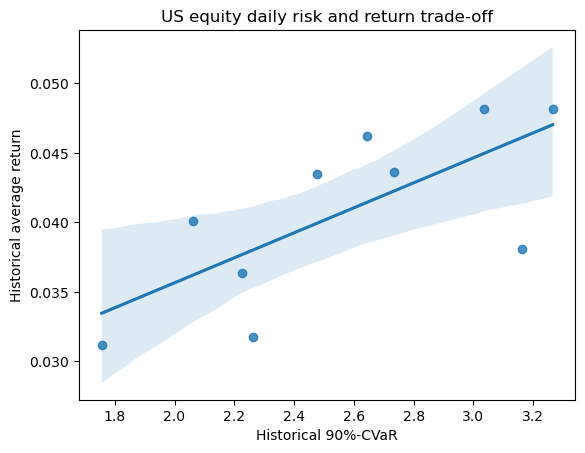

In [4]:
sns.regplot(x=equity_stats['90%-CVaR'], y=equity_stats['Mean'])
plt.title('US equity daily risk and return trade-off')
plt.ylabel('Historical average return')
plt.xlabel('Historical 90%-CVaR')
plt.show()

# Skewness and kurtosis plots

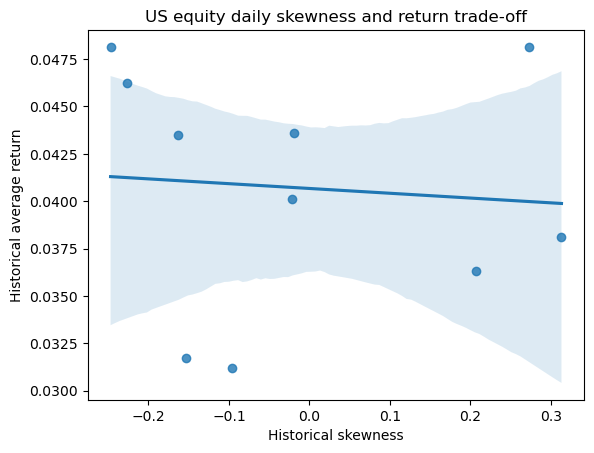

In [5]:
sns.regplot(x=equity_stats['Skewness'], y=equity_stats['Mean'])
plt.title('US equity daily skewness and return trade-off')
plt.ylabel('Historical average return')
plt.xlabel('Historical skewness')
plt.show()

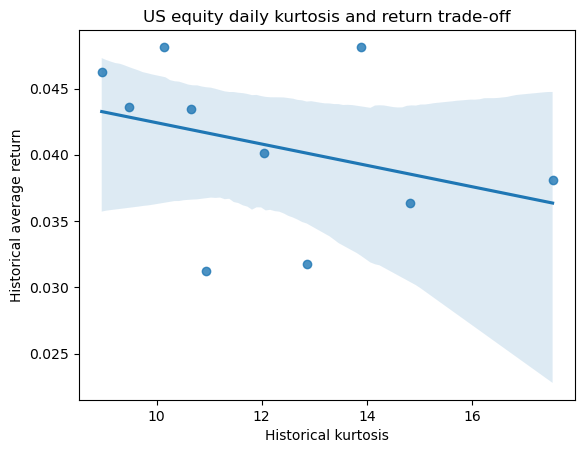

In [6]:
sns.regplot(x=equity_stats['Kurtosis'], y=equity_stats['Mean'])
plt.title('US equity daily kurtosis and return trade-off')
plt.ylabel('Historical average return')
plt.xlabel('Historical kurtosis')
plt.show()